<a href="https://colab.research.google.com/github/lujainn12/COMP-20037/blob/main/Lujain3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
train_path = '/content/drive/MyDrive/Pizza or non-pizza/test'
test_path = '/content/drive/MyDrive/Pizza or non-pizza/train'

In [4]:
import os
print(len(os.listdir('/content/drive/MyDrive/Pizza or non-pizza/train/Pizza')))
print(len(os.listdir('/content/drive/MyDrive/Pizza or non-pizza/train/Non-Pizza')))
print(len(os.listdir('/content/drive/MyDrive/Pizza or non-pizza/test/Pizza')))
print(len(os.listdir('/content/drive/MyDrive/Pizza or non-pizza/test/Non-Pizza')))

983
983
983
983


In [8]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = '/content/drive/MyDrive/Pizza or non-pizza/train'

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_data = train_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='training'
)

validation_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

validation_data = validation_datagen.flow_from_directory(
    train_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary',
    subset='validation'
)

Found 1574 images belonging to 2 classes.
Found 392 images belonging to 2 classes.


In [9]:
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,BatchNormalization,UpSampling2D, Dropout

In [10]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [11]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [12]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


50/50 ━━━━━━━━━━━━━━━━━━━━ 491s 9s/step - accuracy: 0.5799 - loss: 1.2120 - val_accuracy: 0.6250 - val_loss: 0.6439
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 252s 5s/step - accuracy: 0.6274 - loss: 0.6383 - val_accuracy: 0.7194 - val_loss: 0.5464
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 240s 5s/step - accuracy: 0.7234 - loss: 0.5513 - val_accuracy: 0.7245 - val_loss: 0.5383
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 239s 5s/step - accuracy: 0.7439 - loss: 0.5219 - val_accuracy: 0.7423 - val_loss: 0.5519
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 272s 5s/step - accuracy: 0.7796 - loss: 0.4939 - val_accuracy: 0.7755 - val_loss: 0.5018
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 254s 5s/step - accuracy: 0.8362 - loss: 0.3766 - val_accuracy: 0.7551 - val_loss: 0.5711
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 249s 5s/step - accuracy: 0.9113 - loss: 0.2598 - val_accuracy: 0.7347 - val_loss: 0.7088
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 244s 5s/step - accuracy: 0.9274 - loss: 0.1734 - val_accuracy: 0.7066 - val_loss: 0.

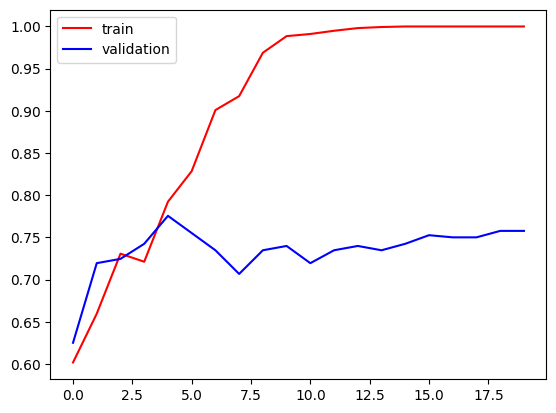

In [13]:
import matplotlib.pyplot as plt

plt.plot(history.history['accuracy'],color='red',label='train')
plt.plot(history.history['val_accuracy'],color='blue',label='validation')
plt.legend()
plt.show()

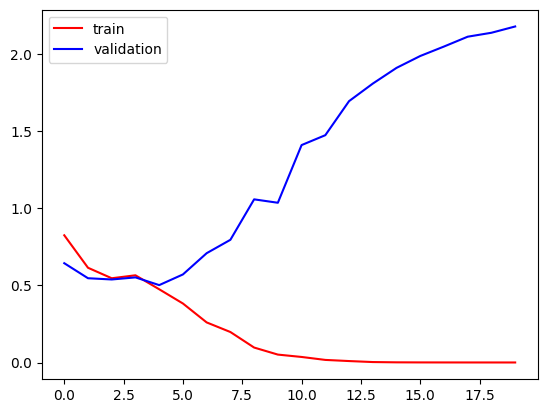

In [14]:
plt.plot(history.history['loss'],color='red',label='train')
plt.plot(history.history['val_loss'],color='blue',label='validation')
plt.legend()
plt.show()

In [16]:
test_dir = '/content/drive/MyDrive/Pizza or non-pizza/test'

test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 1966 images belonging to 2 classes.


In [17]:
predictions = model.predict(test_data)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


62/62 ━━━━━━━━━━━━━━━━━━━━ 204s 3s/step


In [18]:
from sklearn.metrics import confusion_matrix, classification_report

true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)

cm = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(cm)

print("Classification Report:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[501 482]
 [479 504]]
Classification Report:
              precision    recall  f1-score   support

           0       0.51      0.51      0.51       983
           1       0.51      0.51      0.51       983

    accuracy                           0.51      1966
   macro avg       0.51      0.51      0.51      1966
weighted avg       0.51      0.51      0.51      1966



In [19]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),padding='valid',activation='relu',input_shape=(256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),padding='valid',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(128,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation='sigmoid'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
from keras.optimizers import Adam
model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [21]:
history = model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 397s 8s/step - accuracy: 0.6070 - loss: 5.6703 - val_accuracy: 0.5765 - val_loss: 2.8092
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 439s 8s/step - accuracy: 0.7056 - loss: 2.1777 - val_accuracy: 0.5459 - val_loss: 3.2336
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 376s 8s/step - accuracy: 0.7011 - loss: 1.9024 - val_accuracy: 0.5128 - val_loss: 3.9695
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 386s 8s/step - accuracy: 0.7447 - loss: 1.2266 - val_accuracy: 0.5536 - val_loss: 1.7643
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 438s 8s/step - accuracy: 0.7827 - loss: 0.8463 - val_accuracy: 0.5485 - val_loss: 2.8001
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 379s 8s/step - accuracy: 0.8051 - loss: 0.6174 - val_accuracy: 0.5281 - val_loss: 5.7933
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 375s 7s/step - accuracy: 0.7895 - loss: 0.6003 - val_accuracy: 0.6633 - val_loss: 2.0336
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 382s 8s/step - accuracy: 0.8399 - loss: 0.4819 - val_accuracy: 0.7092 - v

In [22]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_data = test_datagen.flow_from_directory(
    test_dir,
    target_size=(256,256),
    batch_size=32,
    class_mode='binary'
)

Found 1966 images belonging to 2 classes.


In [23]:
predictions = model.predict(test_data)

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


62/62 ━━━━━━━━━━━━━━━━━━━━ 103s 2s/step


In [24]:
from sklearn.metrics import confusion_matrix, classification_report

true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)

cm = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(cm)

print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[461 522]
 [469 514]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.50      0.47      0.48       983
           1       0.50      0.52      0.51       983

    accuracy                           0.50      1966
   macro avg       0.50      0.50      0.50      1966
weighted avg       0.50      0.50      0.50      1966



In [25]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten

resnet_model = Sequential()
pretrained_model = tf.keras.applications.ResNet50(include_top = False,
                                                input_shape = (256,256,3),
                                                pooling = 'max', classes = 2,
                                                weights = 'imagenet')
for layer in pretrained_model.layers:
    layer.trainable = False

resnet_model.add(pretrained_model)
resnet_model.add(Flatten())
resnet_model.add(Dense(512, activation = 'relu'))
resnet_model.add(Dense(1, activation = 'sigmoid'))

94765736/94765736 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [26]:
from keras.optimizers import Adam
resnet_model.compile(optimizer=Adam(learning_rate=0.001),loss='binary_crossentropy',metrics=['accuracy'])

In [27]:
history = resnet_model.fit(train_data, epochs=20, validation_data=validation_data)

Epoch 1/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 457s 9s/step - accuracy: 0.4938 - loss: 3.0668 - val_accuracy: 0.6020 - val_loss: 0.6579
Epoch 2/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 501s 9s/step - accuracy: 0.6125 - loss: 0.6712 - val_accuracy: 0.5842 - val_loss: 0.7057
Epoch 3/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 446s 9s/step - accuracy: 0.5786 - loss: 0.7785 - val_accuracy: 0.6990 - val_loss: 0.5974
Epoch 4/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 443s 9s/step - accuracy: 0.7190 - loss: 0.5510 - val_accuracy: 0.6888 - val_loss: 0.5766
Epoch 5/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 449s 9s/step - accuracy: 0.7483 - loss: 0.5317 - val_accuracy: 0.5408 - val_loss: 0.8043
Epoch 6/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 443s 9s/step - accuracy: 0.6151 - loss: 0.7218 - val_accuracy: 0.5638 - val_loss: 0.8032
Epoch 7/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 450s 9s/step - accuracy: 0.6539 - loss: 0.5921 - val_accuracy: 0.6505 - val_loss: 0.6307
Epoch 8/20
50/50 ━━━━━━━━━━━━━━━━━━━━ 498s 9s/step - accuracy: 0.6564 - loss: 0.7034 - val_accuracy: 0.5867 - v

In [28]:
predictions = resnet_model.predict(test_data)

62/62 ━━━━━━━━━━━━━━━━━━━━ 462s 7s/step


In [29]:
from sklearn.metrics import confusion_matrix, classification_report

true_labels = test_data.classes
predicted_labels = (predictions > 0.5).astype(int)

cm = confusion_matrix(true_labels, predicted_labels)

print("Confusion Matrix:")
print(cm)

print("Classification Report after applying techniques to handle overfitting:")
print(classification_report(true_labels, predicted_labels))

Confusion Matrix:
[[454 529]
 [420 563]]
Classification Report after applying techniques to handle overfitting:
              precision    recall  f1-score   support

           0       0.52      0.46      0.49       983
           1       0.52      0.57      0.54       983

    accuracy                           0.52      1966
   macro avg       0.52      0.52      0.52      1966
weighted avg       0.52      0.52      0.52      1966

